# Métricas para evaluación de algoritmos de encriptación
Por ahora, está pensado para una imagen en escala de grises, o en su defecto, para un solo canal

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
#from PIL import Image
import math
from collections import Counter

In [17]:
img1 = mpimg.imread("./img/house.bmp")
img2 = mpimg.imread("./img/house_enc_ecb.bmp")
#se elige el canal rojo
img1_r = img1[:,:,0].astype(float)
img2_r = img2[:,:,0].astype(float)

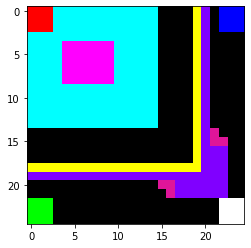

In [18]:
plt.imshow(img1)


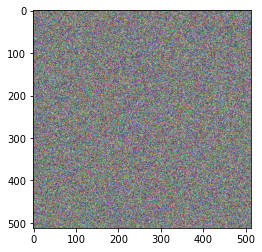

In [13]:
plt.imshow(img2)

## UACI y NPCR

In [4]:
def uaci(img1, img2):
    #255 porque es el valor máximo
    h, b = img1.shape
    return ( sum( sum( np.absolute(img1 - img2) / 255 ) ) ) / (h * b) * 100

In [5]:
def npcr(img1,img2):
    h,b = img1.shape
    return sum( sum( img1 != img2 ) ) / ( h * b ) * 100

In [9]:
u = uaci(img1_r, img2_r)
print("UACI = ", u)

n = npcr(img1_r, img2_r)
print("NPCR = ", n)

UACI =  30.303986493278956
NPCR =  99.61051940917969


## Coeficiente de correlacion
Se toman k puntos/coordenadas aleatorias y se toma el pixel adyacente. Con los vectores del pixel y el pixel adyacente, se calcula la correlacion
Por ahora solo está para los pixeles horizontales

* La correlación puede ser negativa

In [12]:
def correlacion(img1,n_puntos):
    #primero seleccionamos los k puntos, por ahora lo hare para horizontal
    h, b = img1.shape
    x = np.random.choice(b-1,n_puntos,replace=True)
    y = np.random.choice(h-1,n_puntos,replace=True)

    #print(x)
    #print(y)
    x2=x+1  #para horizontal

    #ahora tengo que seleccionar los puntos según  las coordenadas que ya hice
    px1 = img1[x,y]
    px2 = img1[x2,y]

    #calculando los promedios
    px1m = np.mean(px1)
    px2m = np.mean(px2)

    #las restas px - px_mean 
    ppm1 = px1 - px1m
    ppm2 = px2 - px2m

    D1 = sum( ppm1**2 )
    D2 = sum( ppm2**2 )

    cc = sum( ppm1*ppm2 ) / np.sqrt( D1*D2 )

    return cc

In [20]:
c_org = correlacion(img1_r, 5000)
print("Correlacion original = ", c_org)

c_enc = correlacion(img2_r, 5000)
print("Correlacion encriptada = ", c_enc)

Correlacion original =  0.9511898862172247
Correlacion encriptada =  0.005496977660198787


## MSE y PSNR

In [21]:
def mean_squared_error(img1, img2):
    h, b = img1.shape
    return sum( sum( ( img1 - img2 )**2 ) ) / ( h * b )

In [22]:
def psnr(img1, img2):
    mse = mean_squared_error(img1, img2)
    return 20 * math.log10( 255 / (math.sqrt(mse)) )

## Histograma

In [8]:
def histograma(img1, print = True):
    #asumiendo que el max es 255
    #partiendo en 256 bins, hay que poner 1 bin de más
    #density para que me entregue la probabilidad de ese valor
        #eso también me sirve para la probabilidad de entropía
    hist, bins = np.histogram(np.ravel(img1), bins = range(257), density=True)

    if(print):
        plt.bar(bins[:256], hist, align = 'center')
        plt.title('Histograma') 
        plt.ylabel('Probabilidad') 
        plt.xlabel('Bins')  

        plt.show()

    return hist, bins

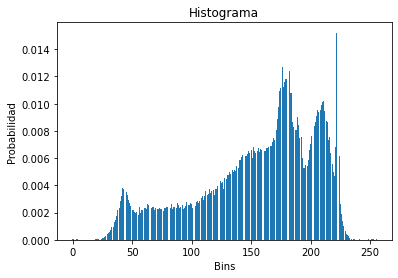

In [9]:
h,b = histograma(img1_r)

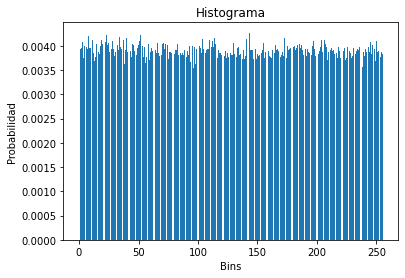

In [10]:
h_e, b_e = histograma(img2_r)

## Entropia Global

In [4]:
def entropia(img1):
    n = img1.shape[0] * img1.shape[1]
    dist = Counter(img1.ravel())
    prob = np.array(list(dist.values())) / n
    
    return sum( prob * np.log2(1.0 / prob) )

In [6]:
e_org = entropia(img1_r)
e_enc = entropia(img2_r)

print("Entropia original = ", e_org )
print("Entropia encriptada = ", e_enc )

Entropia original =  7.415627034511862
Entropia encriptada =  7.999250230344181
